In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
 
image = cv2.imread('img/1.jpg')

img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 100, 200, cv2.THRESH_TOZERO_INV)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



for i in range(len(contours)):
    x ,y, w, h = cv2.boundingRect(contours[i])
    a=w*h    
    aspectRatio = float(w)/h
    if  aspectRatio >= 3 and a>600:
        approx = cv2.approxPolyDP(contours[i], 0.05* cv2.arcLength(contours[i], True), True)
        print(len(approx))
        print(x)
        if len(approx) <= 4 and x>15  :
            width=w
            height=h   
            start_x=x
            start_y=y
            end_x=start_x+width
            end_y=start_y+height      

plate = image[start_y:end_y, start_x:end_x]
cv2.imshow('nomer', image)
cv2.imshow('nomer2', plate)
cv2.waitKey(0)
cv2.destroyAllWindows()

3
548


In [ ]:
gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

largest_contour = max(contours, key=cv2.contourArea)


rect = cv2.minAreaRect(largest_contour)
box = cv2.boxPoints(rect)
box = np.intp(box)


angle = rect[-1]
if angle < -45:
    angle += 90
if (angle < 90):
    (h, w) = plate.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(plate, M, (w, h))
else:
    angle = 0.5;
    (h, w) = plate.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(plate, M, (w, h))

cv2.imshow('nomer2', rotated)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

images = ['img/1.jpg', 'img/2.jpg', 'img/3.jpg']

processed_plates = []

for img_path in images:
    image = cv2.imread(img_path)

    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 100, 200, cv2.THRESH_TOZERO_INV)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for i in range(len(contours)):
        x, y, w, h = cv2.boundingRect(contours[i])
        a = w * h
        aspectRatio = float(w) / h
        if aspectRatio >= 3 and a > 600:
            approx = cv2.approxPolyDP(contours[i], 0.05 * cv2.arcLength(contours[i], True), True)
            if len(approx) <= 4 and x > 15:
                width = w
                height = h
                start_x = x
                start_y = y
                end_x = start_x + width
                end_y = start_y + height
                break

    plate = image[start_y:end_y, start_x:end_x]

    gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    largest_contour = max(contours, key=cv2.contourArea)
    rect = cv2.minAreaRect(largest_contour)
    box = cv2.boxPoints(rect)
    box = np.intp(box)
    angle = rect[-1]

    if angle < -45:
        angle += 90
    if angle < 90:
        (h, w) = plate.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(plate, M, (w, h))
    else:
        angle = 0.5
        (h, w) = plate.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(plate, M, (w, h))

    processed_plates.append(rotated)

for i, rotated_plate in enumerate(processed_plates):
    cv2.imshow(f'Номер {i+1}', rotated_plate)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

images = ['img/1.jpg']

for img_path in images:
    # Загрузка изображения
    image = cv2.imread(img_path)
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Пороговое преобразование для выделения контуров
    ret, thresh = cv2.threshold(img_gray, 100, 200, cv2.THRESH_TOZERO_INV)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Поиск контура номерного знака
    plate_contour = None
    for i in range(len(contours)):
        x, y, w, h = cv2.boundingRect(contours[i])
        area = w * h
        aspect_ratio = float(w) / h
        if aspect_ratio >= 3 and area > 600:  # Условие для фильтрации по форме и размеру
            approx = cv2.approxPolyDP(contours[i], 0.05 * cv2.arcLength(contours[i], True), True)
            if len(approx) <= 4 and x > 15:
                plate_contour = contours[i]
                start_x, start_y, width, height = x, y, w, h
                end_x = start_x + width
                end_y = start_y + height
                break

    # Обрезка области номерного знака
    plate = image[start_y:end_y, start_x:end_x]

    # Коррекция наклона и поворот номерного знака
    gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    _, plate_thresh = cv2.threshold(gray_plate, 150, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(plate_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Корректируем наклон, если требуется
    largest_contour = max(contours, key=cv2.contourArea)
    rect = cv2.minAreaRect(largest_contour)
    box = cv2.boxPoints(rect)
    box = np.intp(box)
    angle = rect[-1]

    if angle < -45:
        angle += 90
    (h, w) = plate.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_plate = cv2.warpAffine(plate, M, (w, h))

    # Обводим номерной знак на исходном изображении
    cv2.drawContours(image, [plate_contour], -1, (0, 255, 0), 2)

    # Отображение и сохранение результатов
    cv2.imshow('Исходное изображение с обведённым номером', image)
    cv2.imshow('Изображение номерного знака', rotated_plate)
    cv2.imwrite(f'processed_plate_{img_path.split("/")[-1]}', rotated_plate)
    cv2.imwrite(f'processed_image_{img_path.split("/")[-1]}', image)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
import numpy as np
import cv2
import pytesseract
from matplotlib import pyplot as plt

# Путь к Tesseract OCR, если требуется
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

images = ['img/1.jpg', 'img/2.jpg', 'img/3.jpg']

for img_path in images:
    image = cv2.imread(img_path)
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 100, 200, cv2.THRESH_TOZERO_INV)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Поиск контура номерного знака
    plate_contour = None
    for i in range(len(contours)):
        x, y, w, h = cv2.boundingRect(contours[i])
        a = w * h
        aspectRatio = float(w) / h
        if aspectRatio >= 3 and a > 600:
            approx = cv2.approxPolyDP(contours[i], 0.05 * cv2.arcLength(contours[i], True), True)
            if len(approx) <= 4 and x > 15:
                plate_contour = contours[i]
                start_x, start_y, width, height = x, y, w, h
                end_x = start_x + width
                end_y = start_y + height
                break

    # Извлечение области номерного знака
    plate = image[start_y:end_y, start_x:end_x]

    # Коррекция наклона и поворот номерного знака
    gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    largest_contour = max(contours, key=cv2.contourArea)
    rect = cv2.minAreaRect(largest_contour)
    box = cv2.boxPoints(rect)
    box = np.intp(box)
    angle = rect[-1]

    if angle < -45:
        angle += 90
    (h, w) = plate.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_plate = cv2.warpAffine(plate, M, (w, h))

    # Распознавание текста с номерного знака
    plate_text = pytesseract.image_to_string(rotated_plate, config='--psm 8')
    print("Распознанный номер:", plate_text)

    # Обводим номер на исходном изображении
    cv2.drawContours(image, [plate_contour], -1, (0, 255, 0), 2)
    cv2.putText(image, plate_text.strip(), (start_x, start_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Показ результатов
    cv2.imshow('Исходное изображение с обведённым номером', image)
    cv2.imshow('Изображение номерного знака', rotated_plate)

    # Сохранение результатов
    cv2.imwrite(f'processed_plate_{img_path.split("/")[-1]}', rotated_plate)
    cv2.imwrite(f'processed_image_{img_path.split("/")[-1]}', image)

cv2.waitKey(0)
cv2.destroyAllWindows()


TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [12]:
import numpy as np
import cv2

# Загрузка изображения
image = cv2.imread('img/1.jpg')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Улучшение контраста с использованием порогового преобразования
_, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Применение морфологических операций (закрытие) для объединения разрывов
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Поиск контуров после морфологической обработки
contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Поиск контура номерного знака
plate_contour = None
for contour in contours:
    # Прямоугольник вокруг контура
    x, y, w, h = cv2.boundingRect(contour)
    
    # Фильтры по соотношению сторон и площади
    area = w * h
    aspect_ratio = float(w) / h
    if 2.5 < aspect_ratio < 5.5 and 1500 < area < 15000:  # Уточнённые условия
        approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
        if len(approx) == 4:  # Проверяем, что контур прямоугольный
            plate_contour = approx
            start_x, start_y, width, height = x, y, w, h
            end_x = start_x + width
            end_y = start_y + height
            break

# Проверяем, нашли ли контур номерного знака
if plate_contour is not None:
    # Обрезаем и сохраняем область номерного знака
    plate = image[start_y:end_y, start_x:end_x]
    cv2.imwrite('extracted_plate.jpg', plate)
    print("Номерной знак успешно извлечён и сохранён как 'extracted_plate.jpg'")
else:
    print("Не удалось найти номерной знак на изображении.")


Номерной знак успешно извлечён и сохранён как 'extracted_plate.jpg'


In [8]:
import numpy as np
import cv2

# Список изображений для обработки
images = ['img/1.jpg']

for img_path in images:
    # Загрузка изображения
    image = cv2.imread(img_path)
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Улучшение контраста с использованием порогового преобразования
    _, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Применение морфологических операций (закрытие) для объединения разрывов
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Поиск контуров после морфологической обработки
    contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Поиск контура номерного знака
    plate_contour = None
    for contour in contours:
        # Прямоугольник вокруг контура
        x, y, w, h = cv2.boundingRect(contour)
        
        # Фильтры по соотношению сторон и площади
        area = w * h
        aspect_ratio = float(w) / h
        if 2.5 < aspect_ratio < 5.5 and 1500 < area < 15000:  # Уточнённые условия
            approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
            if len(approx) == 4:  # Проверяем, что контур прямоугольный
                plate_contour = approx
                start_x, start_y, width, height = x, y, w, h
                end_x = start_x + width
                end_y = start_y + height
                break

    # Проверяем, нашли ли контур номерного знака
    if plate_contour is not None:
        # Обрезаем область номерного знака
        plate = image[start_y:end_y, start_x:end_x]

        # Коррекция наклона номерного знака
        gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
        _, plate_thresh = cv2.threshold(gray_plate, 150, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(plate_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            rect = cv2.minAreaRect(largest_contour)
            box = cv2.boxPoints(rect)
            box = np.intp(box)
            angle = rect[-1]

            if angle < -45:
                angle += 90
            (h, w) = plate.shape[:2]
            center = (w // 2, h // 2)
            M = cv2.getRotationMatrix2D(center, angle, 1.0)
            rotated_plate = cv2.warpAffine(plate, M, (w, h))
        else:
            rotated_plate = plate

        # Обводим контур номерного знака на исходном изображении
        cv2.drawContours(image, [plate_contour], -1, (0, 255, 0), 2)

        # Отображение и сохранение результатов
        cv2.imshow('Исходное изображение с обведённым номером', image)
        cv2.imshow('Изображение номерного знака', rotated_plate)
        cv2.imwrite(f'processed_plate_{img_path.split("/")[-1]}', rotated_plate)
        cv2.imwrite(f'processed_image_{img_path.split("/")[-1]}', image)
    else:
        print(f"Не удалось найти номерной знак на изображении {img_path}")

cv2.waitKey(0)
cv2.destroyAllWindows()


In [10]:
import numpy as np
import cv2
import pytesseract

# Путь к Tesseract OCR, если требуется
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Список изображений для обработки
images = ['img/1.jpg']

for img_path in images:
    # Загрузка изображения
    image = cv2.imread(img_path)
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Улучшение контраста с использованием порогового преобразования
    _, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Применение морфологических операций (закрытие) для объединения разрывов
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Поиск контуров после морфологической обработки
    contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Поиск контура номерного знака
    plate_contour = None
    for contour in contours:
        # Прямоугольник вокруг контура
        x, y, w, h = cv2.boundingRect(contour)
        
        # Фильтры по соотношению сторон и площади
        area = w * h
        aspect_ratio = float(w) / h
        if 2.5 < aspect_ratio < 5.5 and 1500 < area < 15000:  # Уточнённые условия
            approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
            if len(approx) == 4:  # Проверяем, что контур прямоугольный
                plate_contour = approx
                start_x, start_y, width, height = x, y, w, h
                end_x = start_x + width
                end_y = start_y + height
                break

    # Проверяем, нашли ли контур номерного знака
    if plate_contour is not None:
        # Обрезаем область номерного знака
        plate = image[start_y:end_y, start_x:end_x]

        # Коррекция наклона номерного знака
        gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
        _, plate_thresh = cv2.threshold(gray_plate, 150, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(plate_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            rect = cv2.minAreaRect(largest_contour)
            box = cv2.boxPoints(rect)
            box = np.intp(box)
            angle = rect[-1]

            if angle < -45:
                angle += 90
            (h, w) = plate.shape[:2]
            center = (w // 2, h // 2)
            M = cv2.getRotationMatrix2D(center, angle, 1.0)
            rotated_plate = cv2.warpAffine(plate, M, (w, h))
        else:
            rotated_plate = plate

        # Распознавание текста с помощью Tesseract
        plate_text = pytesseract.image_to_string(rotated_plate, config='--psm 8')
        print(f"Распознанный номер на изображении {img_path}: {plate_text.strip()}")

        # Обводим контур номерного знака на исходном изображении
        cv2.drawContours(image, [plate_contour], -1, (0, 255, 0), 2)
        cv2.putText(image, plate_text.strip(), (start_x, start_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Отображение и сохранение результатов
        cv2.imshow('Исходное изображение с обведённым номером', image)
        cv2.imshow('Изображение номерного знака', rotated_plate)
        cv2.imwrite(f'processed_plate_{img_path.split("/")[-1]}', rotated_plate)
        cv2.imwrite(f'processed_image_{img_path.split("/")[-1]}', image)
    else:
        print(f"Не удалось найти номерной знак на изображении {img_path}")

cv2.waitKey(0)
cv2.destroyAllWindows()


Распознанный номер на изображении img/1.jpg: “TBDOMK OL


In [11]:
import numpy as np
import cv2
import pytesseract

# Путь к Tesseract OCR, если требуется
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Список изображений для обработки
images = ['img/1.jpg']

for img_path in images:
    # Загрузка изображения
    image = cv2.imread(img_path)
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Улучшение контраста с использованием порогового преобразования
    _, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Применение морфологических операций (закрытие) для объединения разрывов
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Поиск контуров после морфологической обработки
    contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Поиск контура номерного знака
    plate_contour = None
    for contour in contours:
        # Прямоугольник вокруг контура
        x, y, w, h = cv2.boundingRect(contour)
        
        # Фильтры по соотношению сторон и площади
        area = w * h
        aspect_ratio = float(w) / h
        if 2.5 < aspect_ratio < 5.5 and 1500 < area < 15000:  # Уточнённые условия
            approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
            if len(approx) == 4:  # Проверяем, что контур прямоугольный
                plate_contour = approx
                start_x, start_y, width, height = x, y, w, h
                end_x = start_x + width
                end_y = start_y + height
                break

    # Проверяем, нашли ли контур номерного знака
    if plate_contour is not None:
        # Обрезаем область номерного знака
        plate = image[start_y:end_y, start_x:end_x]

        # Дополнительное улучшение для OCR
        gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
        # Увеличение контрастности
        plate_enhanced = cv2.convertScaleAbs(gray_plate, alpha=1.5, beta=20)
        
        # Бинаризация и морфология для улучшения качества текста
        _, plate_thresh = cv2.threshold(plate_enhanced, 150, 255, cv2.THRESH_BINARY)
        plate_cleaned = cv2.morphologyEx(plate_thresh, cv2.MORPH_OPEN, kernel)

        # Отправка улучшенного изображения в Tesseract
        custom_config = r'--oem 3 --psm 8 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
        plate_text = pytesseract.image_to_string(plate_cleaned, config=custom_config)
        
        # Вывод распознанного текста в консоль
        print(f"Распознанный номер на изображении {img_path}: {plate_text.strip()}")

        # Обводим контур номерного знака на исходном изображении (без текста)
        cv2.drawContours(image, [plate_contour], -1, (0, 255, 0), 2)

        # Отображение и сохранение результатов
        cv2.imshow('Исходное изображение с обведённым номером', image)
        cv2.imshow('Изображение номерного знака', plate_cleaned)
        cv2.imwrite(f'processed_plate_{img_path.split("/")[-1]}', plate_cleaned)
        cv2.imwrite(f'processed_image_{img_path.split("/")[-1]}', image)
    else:
        print(f"Не удалось найти номерной знак на изображении {img_path}")

cv2.waitKey(0)
cv2.destroyAllWindows()


Распознанный номер на изображении img/1.jpg: RE


In [34]:
import cv2
import numpy as np
import pytesseract

# Путь к Tesseract OCR, если требуется
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Загрузка изображения номерного знака
plate = cv2.imread('extracted_plate.jpg')

# Увеличение изображения для улучшения детализации
scale_percent = 300  # Увеличение на 300%
width = int(plate.shape[1] * scale_percent / 100)
height = int(plate.shape[0] * scale_percent / 100)
dim = (width, height)
resized_plate = cv2.resize(plate, dim, interpolation=cv2.INTER_CUBIC)
cv2.imshow("Enhanced Plate", resized_plate)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Преобразование в оттенки серого
gray_plate = cv2.cvtColor(resized_plate, cv2.COLOR_BGR2GRAY)
cv2.imshow("Enhanced Plate", gray_plate)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Применение адаптивного порогового преобразования
binary_plate = cv2.adaptiveThreshold(gray_plate, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                     cv2.THRESH_BINARY, 11, 2)

# Сохранение и отображение для визуальной проверки
cv2.imshow("Enhanced Plate", binary_plate)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Обновлённый вайтлист для распознавания
whitelist = 'ABCEHMOPTXYK0123456789'
custom_config = f'--oem 3 --psm 8 -c tessedit_char_whitelist={whitelist}'

# Распознавание текста на улучшенном изображении
print("Результат распознавания на улучшенном изображении:")
text = pytesseract.image_to_string(gray_plate, config=custom_config)
print(f"Распознанный номер: {text.strip()}")


Результат распознавания на улучшенном изображении:
Распознанный номер: TB29MKOP


Распознанный номер: 


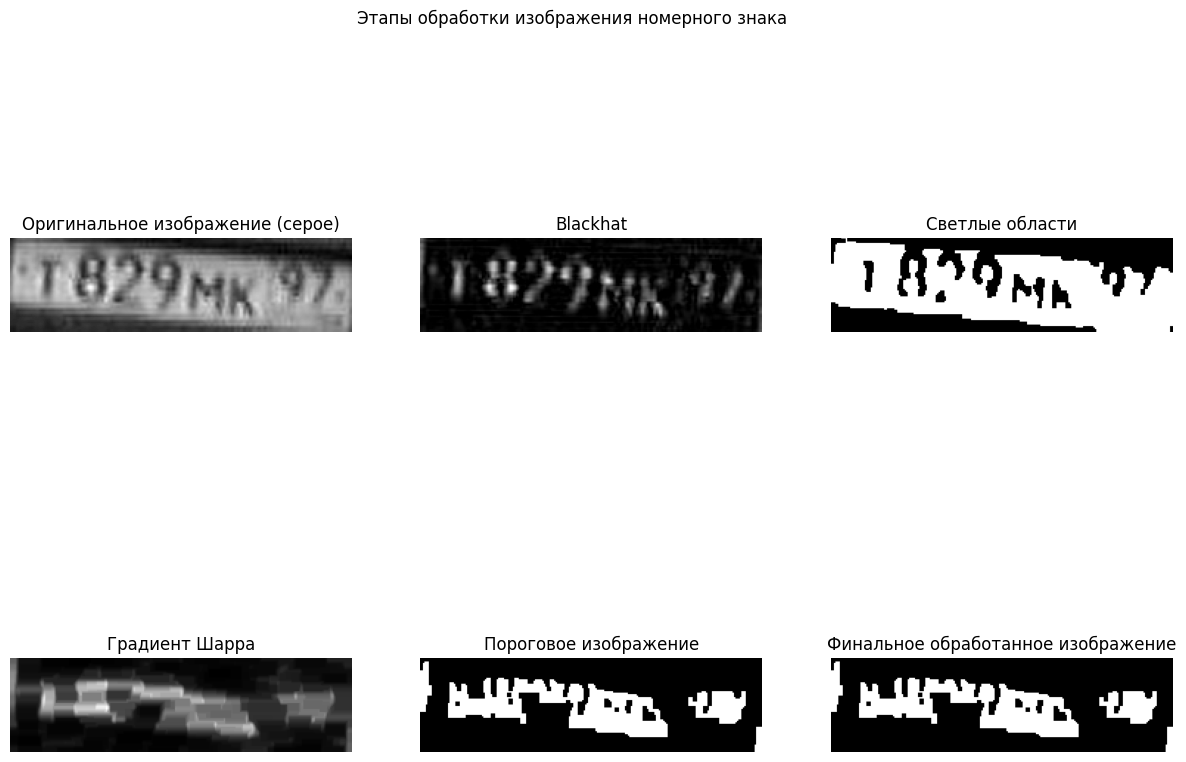

In [43]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

# Загрузка изображения номерного знака
plate = cv2.imread('extracted_plate.jpg')

# 1. Изменение размера изображения
resized_plate = cv2.resize(
    plate, None, fx=2, fy=2,
    interpolation=cv2.INTER_CUBIC)

# 2. Конвертация в градации серого
gray = cv2.cvtColor(resized_plate, cv2.COLOR_BGR2GRAY)

# 3. Применение "чёрной шляпы" для выделения тёмных символов на светлом фоне
rectKern = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKern)

# 4. Выделение светлых областей с использованием операции закрытия и бинаризации
squareKern = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
light = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, squareKern)
_, light = cv2.threshold(light, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 5. Вычисление градиента Шарра для выделения границ символов
gradX = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = 255 * ((gradX - minVal) / (maxVal - minVal))
gradX = gradX.astype("uint8")

# 6. Сглаживание, закрытие и пороговая обработка
gradX = cv2.GaussianBlur(gradX, (5, 5), 0)
gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKern)
_, thresh = cv2.threshold(gradX, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 7. Очистка с помощью эрозии и дилатации
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# 8. Маскирование светлых областей и финальная обработка
thresh = cv2.bitwise_and(thresh, thresh, mask=light)
thresh = cv2.dilate(thresh, None, iterations=2)
thresh = cv2.erode(thresh, None, iterations=1)

# Обновлённый вайтлист для Tesseract
whitelist = 'ABCEHMOPTXYK0123456789'
custom_config = f'--oem 3 --psm 8 -c tessedit_char_whitelist={whitelist}'

# Распознавание текста на финальном изображении
text = pytesseract.image_to_string(thresh, config=custom_config)
print(f"Распознанный номер: {text.strip()}")

# Отображение всех этапов обработки в Matplotlib
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Этапы обработки изображения номерного знака')

# Отображение оригинального изображения в градациях серого
axs[0, 0].imshow(gray, cmap='gray')
axs[0, 0].set_title("Оригинальное изображение (серое)")
axs[0, 0].axis('off')

# Отображение изображения после "чёрной шляпы"
axs[0, 1].imshow(blackhat, cmap='gray')
axs[0, 1].set_title("Blackhat")
axs[0, 1].axis('off')

# Отображение выделения светлых областей
axs[0, 2].imshow(light, cmap='gray')
axs[0, 2].set_title("Светлые области")
axs[0, 2].axis('off')

# Отображение градиента Шарра
axs[1, 0].imshow(gradX, cmap='gray')
axs[1, 0].set_title("Градиент Шарра")
axs[1, 0].axis('off')

# Отображение изображения после пороговой обработки
axs[1, 1].imshow(thresh, cmap='gray')
axs[1, 1].set_title("Пороговое изображение")
axs[1, 1].axis('off')

# Отображение финального результата
axs[1, 2].imshow(thresh, cmap='gray')
axs[1, 2].set_title("Финальное обработанное изображение")
axs[1, 2].axis('off')

plt.show()


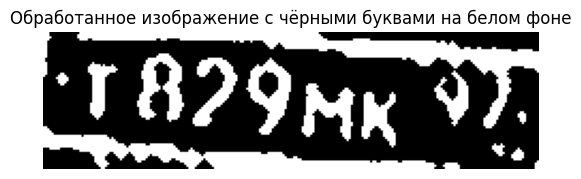

Распознанный номер: TB29MKOP


In [82]:
import re
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

# Загрузка изображения номерного знака
plate = cv2.imread('extracted_plate.jpg')

# Изменение размера для улучшения качества
resized_plate = cv2.resize(plate, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Преобразование в градации серого
gray = cv2.cvtColor(resized_plate, cv2.COLOR_BGR2GRAY)

# Применение адаптивного порогового преобразования для бинаризации изображения
thresh = cv2.adaptiveThreshold(gray, 255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 41, 10)

# Удаление мелких шумов с помощью морфологического открытия
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# Удаление рамок номерного знака с помощью удаления крупных контуров по периметру
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# Дополнительная очистка изображения с помощью морфологических операций
# Заполнение возможных разрывов в символах
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# Отображение финального результата
plt.imshow(thresh, cmap='gray')
plt.title('Обработанное изображение с чёрными буквами на белом фоне')
plt.axis('off')
plt.show()

# Настройки Tesseract для русского и английского языков (если необходимо)
whitelist = 'ABCEHMOPTXYK0123456789'
custom_config = f'--oem 1 --psm 7 -c tessedit_char_whitelist={whitelist}'

# Распознавание текста на финальном изображении
text = pytesseract.image_to_string(thresh, config=custom_config)
print(f"Распознанный номер: {text.strip()}")


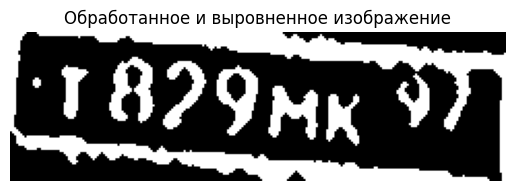

Распознанный номер: T829MK97


In [91]:
import re
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

# Загрузка изображения номерного знака
plate = cv2.imread('extracted_plate.jpg')

# Изменение размера для улучшения качества
resized_plate = cv2.resize(plate, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Преобразование в градации серого
gray = cv2.cvtColor(resized_plate, cv2.COLOR_BGR2GRAY)

# Применение фильтра размытия для уменьшения шумов
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# Применение адаптивного порогового преобразования для бинаризации изображения
thresh = cv2.adaptiveThreshold(gray, 255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 41, 10)

# Удаление мелких шумов с помощью морфологического открытия
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# Дополнительная очистка изображения с помощью морфологических операций
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# Отображение финального результата
plt.imshow(thresh, cmap='gray')
plt.title('Обработанное и выровненное изображение')
plt.axis('off')
plt.show()

# Настройки Tesseract для русского и английского языков (если необходимо)
whitelist = 'ABCEHMOPTXYK0123456789'
custom_config = f'--oem 1 --psm 10 -c tessedit_char_whitelist={whitelist}'

# Распознавание текста на финальном изображении
text = pytesseract.image_to_string(thresh, config=custom_config)
print(f"Распознанный номер: {text.strip()}")



Распознанный номер для img/1.jpg: CT829MK97


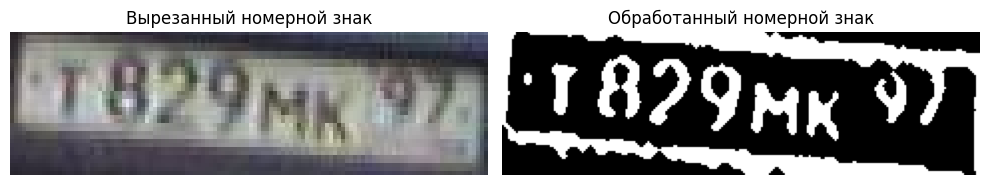

Распознанный номер для img/2.jpg: AO2397


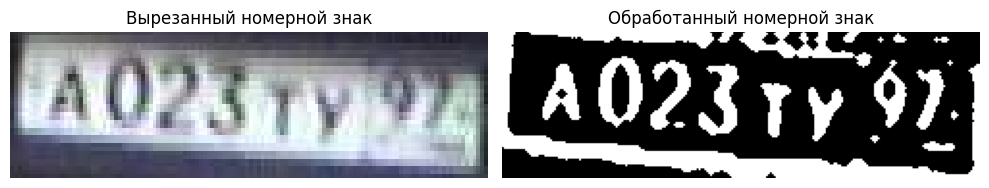

Распознанный номер для img/3.jpg: K263C097


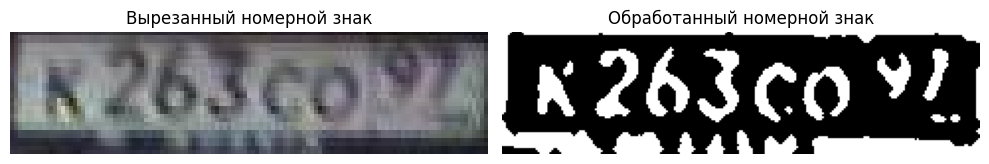

In [98]:
import numpy as np
import cv2
import pytesseract
from matplotlib import pyplot as plt

# Список входных изображений
images = ['img/1.jpg', 'img/2.jpg', 'img/3.jpg']

# Настройки для Tesseract
whitelist = 'ABCEHMOPTXYK0123456789'
custom_config = f'--oem 1 --psm 10 -c tessedit_char_whitelist={whitelist}'

# Обработка изображений
for img_path in images:
    image = cv2.imread(img_path)
    if image is None:
        print(f"Не удалось загрузить изображение: {img_path}")
        continue

    # Преобразование в градации серого и бинаризация
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 100, 200, cv2.THRESH_TOZERO_INV)

    # Поиск контуров
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    plate = None

    for i in range(len(contours)):
        x, y, w, h = cv2.boundingRect(contours[i])
        a = w * h
        aspectRatio = float(w) / h
        if aspectRatio >= 3 and a > 600:
            approx = cv2.approxPolyDP(contours[i], 0.05 * cv2.arcLength(contours[i], True), True)
            if len(approx) <= 4 and x > 15:
                plate = image[y:y + h, x:x + w]
                break

    if plate is None:
        print(f"Номерной знак не найден на изображении: {img_path}")
        continue

    # Преобразование в градации серого для номерного знака
    gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

    # Увеличение размера для улучшения качества
    resized_plate = cv2.resize(gray_plate, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    # Фильтрация и бинаризация
    gray = cv2.GaussianBlur(resized_plate, (3, 3), 0)
    thresh = cv2.adaptiveThreshold(gray, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 41, 10)

    # Морфологические операции для очистки изображения
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Распознавание текста
    text = pytesseract.image_to_string(thresh, config=custom_config)
    print(f"Распознанный номер для {img_path}: {text.strip()}")

    # Отображение исходного номерного знака и обработанной версии
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Вырезанный номерной знак')
    axes[0].axis('off')

    axes[1].imshow(thresh, cmap='gray')
    axes[1].set_title('Обработанный номерной знак')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()


Распознанный номер для img/3.jpg: K2O3COT


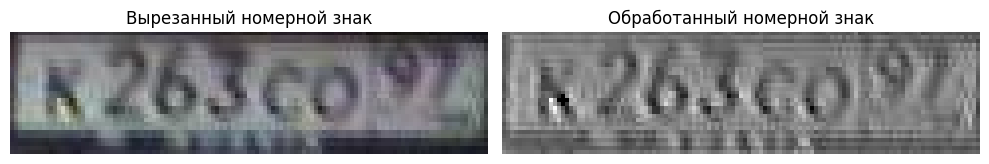

In [173]:
import numpy as np
import cv2
import scipy.fftpack
import pytesseract
from matplotlib import pyplot as plt

# Настройки для Tesseract
whitelist = 'ABCEHMOPTXYK0123456789'
custom_config = f'--oem 1 --psm 10 -c tessedit_char_whitelist={whitelist}'

# Определение функции imclearborder
def imclearborder(imgBW, radius):
    imgBWcopy = imgBW.copy()
    contours, _ = cv2.findContours(imgBWcopy.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    imgRows, imgCols = imgBW.shape

    contourList = []
    for idx in range(len(contours)):
        cnt = contours[idx]
        for pt in cnt:
            rowCnt = pt[0][1]
            colCnt = pt[0][0]
            check1 = (rowCnt >= 0 and rowCnt < radius) or (rowCnt >= imgRows - radius and rowCnt < imgRows)
            check2 = (colCnt >= 0 and colCnt < radius) or (colCnt >= imgCols - radius and colCnt < imgCols)
            if check1 or check2:
                contourList.append(idx)
                break

    for idx in contourList:
        cv2.drawContours(imgBWcopy, contours, idx, (0, 0, 0), -1)

    return imgBWcopy

# Определение функции bwareaopen
def bwareaopen(imgBW, areaPixels):
    imgBWcopy = imgBW.copy()
    contours, _ = cv2.findContours(imgBWcopy.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    for idx in range(len(contours)):
        area = cv2.contourArea(contours[idx])
        if 0 < area <= areaPixels:
            cv2.drawContours(imgBWcopy, contours, idx, (0, 0, 0), -1)
    return imgBWcopy

# Гомоморфная фильтрация
def homomorphic_filter(image):
    rows, cols = image.shape
    
    imgLog = np.log1p(np.array(image, dtype="float") / 255)
    
    M, N =  rows + 1, cols + 1
    sigma = 10
    X, Y = np.meshgrid(np.linspace(0, N - 1, N), np.linspace(0, M - 1, M))
    centerX, centerY = np.ceil(N / 2), np.ceil(M / 2)
    gaussianNumerator = (X - centerX) ** 2 + (Y - centerY) ** 2

    Hlow = np.exp(-gaussianNumerator / (2 * sigma ** 2))
    Hhigh = 1 - Hlow
    HlowShift = scipy.fftpack.ifftshift(Hlow)
    HhighShift = scipy.fftpack.ifftshift(Hhigh)

    If = scipy.fftpack.fft2(imgLog, (M, N))
    Ioutlow = np.real(scipy.fftpack.ifft2(If * HlowShift, (M, N)))
    Iouthigh = np.real(scipy.fftpack.ifft2(If * HhighShift, (M, N)))
    
    gamma1, gamma2 = 0.3, 1.5
    Iout = gamma1 * Ioutlow[:rows, :cols] + gamma2 * Iouthigh[:rows, :cols]
    
    Ihmf = np.expm1(Iout)
    Ihmf = (Ihmf - np.min(Ihmf)) / (np.max(Ihmf) - np.min(Ihmf))
    Ihmf2 = np.array(255 * Ihmf, dtype="uint8")
    cv2.imshow("", Ihmf2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    Ithresh = Ihmf2 < 110
    Ithresh = 255 * Ithresh.astype("uint8")
    

    Iopen = bwareaopen(Ihmf2, 11)
    return Iopen

# Список входных изображений
images = ['img/3.jpg']#, 'img/2.jpg', 'img/3.jpg']

# Основной обработчик
for img_path in images:
    image = cv2.imread(img_path)
    if image is None:
        print(f"Не удалось загрузить изображение: {img_path}")
        continue

    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 100, 200, cv2.THRESH_TOZERO_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    plate = None
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspectRatio = float(w) / h
        if aspectRatio >= 3 and w * h > 600:
            plate = image[y:y + h, x:x + w]
            break

    if plate is None:
        print(f"Номерной знак не найден на изображении: {img_path}")
        continue

    gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    processed_plate = homomorphic_filter(gray_plate)

    text = pytesseract.image_to_string(processed_plate, config=custom_config)
    print(f"Распознанный номер для {img_path}: {text.strip()}")

    # Отображение результатов
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Вырезанный номерной знак')
    axes[0].axis('off')

    axes[1].imshow(processed_plate, cmap='gray')
    axes[1].set_title('Обработанный номерной знак')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()


Найдено контуров: 15
Распознанный номер для img/1.jpg: 
Распознанный номер для img/1.jpg: 1829MK97


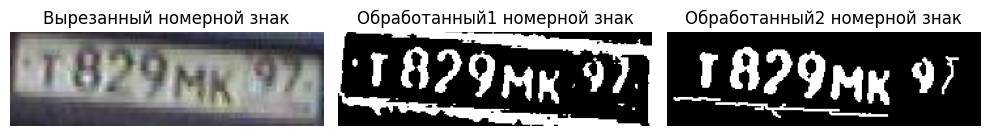

Найдено контуров: 32
Распознанный номер для img/2.jpg: 
Распознанный номер для img/2.jpg: A023y92


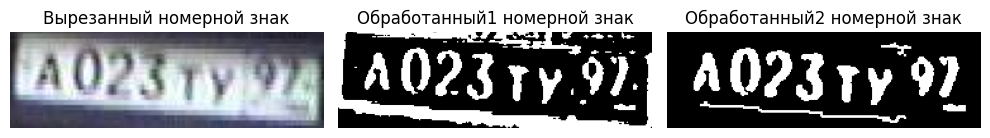

Найдено контуров: 24
Распознанный номер для img/3.jpg: 
Распознанный номер для img/3.jpg: K263097


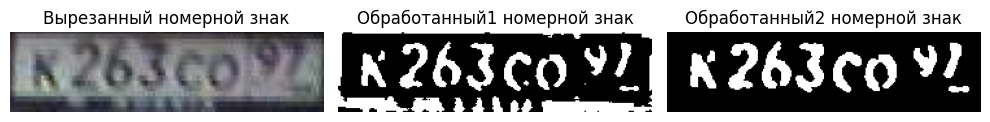

In [380]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Список входных изображений
images = ['img/1.jpg', 'img/2.jpg', 'img/3.jpg']

# Белый список символов
whitelist = 'ABCEHMOPTXyK0123456789'
custom_config = f'--oem 1 --psm 7 -c tessedit_char_whitelist={whitelist}'

def expand_characters(image, kernel_size=(3, 3), iterations=1):
    """
    Функция для наращивания (расширения) символов на изображении.
    
    :param image: Входное бинарное изображение (чёрно-белое).
    :param kernel_size: Размер ядра для морфологической операции (ширина, высота).
    :param iterations: Количество итераций расширения.
    :return: Изображение с расширенными символами.
    """
    # Создаём ядро
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    
    # Применяем морфологическое расширение
    dilated_image = cv2.dilate(image, kernel, iterations=iterations)
    
    return dilated_image


def imclearborder1(imgBW, radius=1):
    """
    Удаляет только те объекты, которые непосредственно касаются границ изображения.
    
    :param imgBW: Бинарное изображение (чёрно-белое, 0 и 255).
    :param radius: Расстояние от границы, в пределах которого объект считается касающимся.
    :return: Изображение с удалёнными объектами, касающимися границ.
    """
    imgBWcopy = imgBW.copy()

    # Находим контуры
    contours, _ = cv2.findContours(imgBWcopy.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    imgRows, imgCols = imgBW.shape

    # Список контуров, которые касаются границы
    contourList = []

    for idx, cnt in enumerate(contours):
        for pt in cnt:
            rowCnt = pt[0][1]  # y-координата
            colCnt = pt[0][0]  # x-координата

            # Проверка на касание границы
            check1 = (rowCnt >= 0 and rowCnt < radius) or (rowCnt >= imgRows - radius and rowCnt < imgRows)
            check2 = (colCnt >= 0 and colCnt < radius) or (colCnt >= imgCols - radius and colCnt < imgCols)
            if check1 or check2:
                contourList.append(idx)
                break

    # Удаляем найденные контуры
    for idx in contourList:
        cv2.drawContours(imgBWcopy, contours, idx, (0, 0, 0), -1)

    return imgBWcopy


# Функция для создания эталонных шаблонов символов
def generate_templates(whitelist):
    templates = {}
    for char in whitelist:
        img = np.zeros((50, 30), dtype=np.uint8)  # Пустое изображение для символа
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, char, (5, 40), font, 1.2, 255, 2, cv2.LINE_AA)
        templates[char] = img
    return templates

# Функция для фильтрации маленьких областей (bwareaopen)
def bwareaopen(imgBW, areaPixels):
    imgBWcopy = imgBW.copy()
    contours, _ = cv2.findContours(imgBWcopy, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        if cv2.contourArea(contour) < areaPixels:
            cv2.drawContours(imgBWcopy, [contour], -1, 0, -1)
    return imgBWcopy

# Распознавание символов
def recognize_characters(image, templates):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    recognized_text = ""

    for contour in sorted(contours, key=lambda x: cv2.boundingRect(x)[0]):  # Сортировка слева направо
        x, y, w, h = cv2.boundingRect(contour)
        if w > 10 and h > 20:  # Фильтр по размеру символов
            roi = image[y:y+h, x:x+w]
            roi_resized = cv2.resize(roi, (30, 50), interpolation=cv2.INTER_CUBIC)

            # Сравнение с шаблонами
            best_match = None
            max_corr = -1
            for char, template in templates.items():
                res = cv2.matchTemplate(roi_resized, template, cv2.TM_CCOEFF_NORMED)
                _, corr, _, _ = cv2.minMaxLoc(res)
                if corr > max_corr:
                    max_corr = corr
                    best_match = char

            if best_match is not None and max_corr > 0.5:  # Порог корреляции
                recognized_text += best_match

    return recognized_text
def imclearborder(imgBW, radius=1, area_threshold=50, aspect_ratio_threshold=0.1):
    """
    Удаляет объекты, которые выходят за границу изображения,
    сохраняя важные объекты, даже если они касаются границ.

    :param imgBW: Бинарное изображение (чёрно-белое, 0 и 255).
    :param radius: Радиус касания границы.
    :param area_threshold: Минимальная площадь объекта для его сохранения.
    :param aspect_ratio_threshold: Минимальное отношение ширины к высоте.
    :return: Изображение с удалёнными объектами.
    """
    imgBWcopy = imgBW.copy()

    # ШАГ 1: Морфологическая эрозия для разъединения объектов
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    eroded = cv2.erode(imgBWcopy, kernel, iterations=1)

    # ШАГ 2: Находим контуры
    contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    imgRows, imgCols = imgBW.shape

    print("Найдено контуров:", len(contours))
    for cnt_idx, cnt in enumerate(contours):
        # Вычисляем ограничивающий прямоугольник
        x, y, w, h = cv2.boundingRect(cnt)
        area = cv2.contourArea(cnt)

        # Проверяем вытянутость объекта
        aspect_ratio = w / h if h != 0 else 0

        # Определяем точки, касающиеся границы
        touches_border = (
            x <= radius or y <= radius or 
            x + w >= imgCols - radius or 
            y + h >= imgRows - radius
        )

        # Условие для удаления: объект выходит за границу, мал по площади и не является вытянутым
        if touches_border :
            cv2.drawContours(imgBWcopy, [cnt], -1, (0, 0, 0), -1)



    return imgBWcopy
# Генерация шаблонов символов
templates = generate_templates(whitelist)

# Обработка изображений
for img_path in images:
    image = cv2.imread(img_path)
    if image is None:
        print(f"Не удалось загрузить изображение: {img_path}")
        continue

    # Преобразование в градации серого и бинаризация
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 100, 200, cv2.THRESH_TOZERO_INV)

    # Поиск контуров
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    plate = None

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        a = w * h
        aspectRatio = float(w) / h
        if aspectRatio >= 3 and a > 600:
            plate = image[y:y + h, x:x + w]
            break

    if plate is None:
        print(f"Номерной знак не найден на изображении: {img_path}")
        continue

    # Преобразование в градации серого для номерного знака
    gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

    # Увеличение размера для улучшения качества
    resized_plate = cv2.resize(gray_plate, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    # Фильтрация и бинаризация
    gray = cv2.GaussianBlur(resized_plate, (3, 3), 0)
    thresh = cv2.adaptiveThreshold(gray, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 41, 10)

    # Удаление мелких областей
    expanded_image = expand_characters(imclearborder1(imclearborder(thresh, 2), 5), kernel_size=(2, 2), iterations=1)
    processed_plate = bwareaopen(expanded_image, 30)

    # Распознавание текста с использованием шаблонов
    recognized_text = recognize_characters(processed_plate, templates)

    print(f"Распознанный номер для {img_path}: {recognized_text}")
    text = pytesseract.image_to_string(processed_plate, config=custom_config)
    print(f"Распознанный номер для {img_path}: {text.strip()}")
    # Отображение исходного номерного знака и обработанной версии
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Вырезанный номерной знак')
    axes[0].axis('off')

    axes[1].imshow(thresh, cmap='gray')
    axes[1].set_title('Обработанный1 номерной знак')
    axes[1].axis('off')

    axes[2].imshow(processed_plate, cmap='gray')
    axes[2].set_title('Обработанный2 номерной знак')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()




Найдено контуров для распознавания: 9
Не удалось распознать символ: x=17, y=14, w=22, h=31, корреляция: 0.27
Не удалось распознать символ: x=47, y=9, w=23, h=36, корреляция: 0.15
Не удалось распознать символ: x=72, y=7, w=25, h=38, корреляция: 0.24
Не удалось распознать символ: x=98, y=8, w=24, h=40, корреляция: 0.30
Не удалось распознать символ: x=127, y=15, w=24, h=33, корреляция: 0.14
Не удалось распознать символ: x=151, y=17, w=27, h=30, корреляция: 0.20
Не удалось распознать символ: x=190, y=11, w=18, h=24, корреляция: 0.30
Не удалось распознать символ: x=213, y=9, w=14, h=27, корреляция: 0.30
Распознанный номер: 


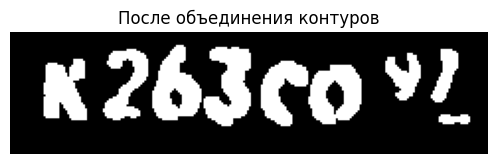

In [310]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Белый список символов (набор символов, которые могут быть в номере)
whitelist = 'ABCEHKMOPTXy0123456789'

# Генерация шаблонов для каждого символа
def generate_templates(whitelist):
    templates = {}
    for char in whitelist:
        img = np.zeros((50, 30), dtype=np.uint8)  # Пустое изображение
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, char, (5, 40), font, 1.2, 255, 2, cv2.LINE_AA)  # Рисуем символ
        templates[char] = img
    return templates

def merge_close_contours(image, distance_threshold=10):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    merged_contours = []

    used = set()  # Множество индексов использованных контуров

    for i, cnt1 in enumerate(contours):
        if i in used:
            continue
        new_contour = cnt1.copy()
        for j, cnt2 in enumerate(contours):
            if i != j and j not in used:
                # Вычисляем минимальное расстояние от cnt1 к cnt2
                min_distance = float("inf")
                for pt1 in cnt1:
                    for pt2 in cnt2:
                        dist = np.linalg.norm(np.array(pt1[0]) - np.array(pt2[0]))
                        if dist < min_distance:
                            min_distance = dist
                if min_distance < distance_threshold:  # Если расстояние меньше порога
                    new_contour = np.vstack((new_contour, cnt2))  # Объединяем контуры
                    used.add(j)
        used.add(i)
        merged_contours.append(new_contour)

    # Рисуем новые контуры на чистом изображении
    merged_image = np.zeros_like(image)
    cv2.drawContours(merged_image, merged_contours, -1, 255, -1)
    return merged_image


# Распознавание символов через сопоставление шаблонов
def recognize_characters(image, templates):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    recognized_text = ""

    # Сортируем контуры слева направо
    sorted_contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])

    print(f"Найдено контуров для распознавания: {len(sorted_contours)}")
    for contour in sorted_contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 10 and h > 20:  # Фильтруем слишком маленькие объекты
            roi = image[y:y+h, x:x+w]
            roi_resized = cv2.resize(roi, (30, 50), interpolation=cv2.INTER_CUBIC)

            # Сравниваем ROI с каждым шаблоном
            best_match = None
            max_corr = -1
            for char, template in templates.items():
                res = cv2.matchTemplate(roi_resized, template, cv2.TM_CCOEFF_NORMED)
                _, corr, _, _ = cv2.minMaxLoc(res)
                if corr > max_corr:
                    max_corr = corr
                    best_match = char

            if best_match is not None and max_corr > 0.5:  # Порог корреляции
                print(f"Распознан символ: {best_match}, корреляция: {max_corr:.2f}")
                recognized_text += best_match
            else:
                print(f"Не удалось распознать символ: x={x}, y={y}, w={w}, h={h}, корреляция: {max_corr:.2f}")

    return recognized_text

def selective_dilation(image, distance_threshold=10, iterations=1):
    """
    Выполняет "наращивание" (дилатацию) символов, чтобы соединить близкие контуры.
    
    :param image: Бинарное изображение.
    :param distance_threshold: Максимальное расстояние между контурами для их соединения.
    :param iterations: Количество итераций для расширения.
    :return: Обработанное изображение.
    """
    # Копируем изображение
    image_copy = image.copy()

    # Находим контуры
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Создаём маску для временного соединения контуров
    temp_mask = np.zeros_like(image)

    for i, cnt1 in enumerate(contours):
        for j, cnt2 in enumerate(contours):
            if i != j:  # Сравниваем контуры только с другими
                # Находим минимальное расстояние между точками двух контуров
                min_distance = float("inf")
                for pt1 in cnt1:
                    for pt2 in cnt2:
                        dist = np.linalg.norm(np.array(pt1[0]) - np.array(pt2[0]))
                        if dist < min_distance:
                            min_distance = dist

                # Если расстояние меньше порога, соединяем контуры
                if min_distance < distance_threshold:
                    # Рисуем оба контура на временной маске
                    cv2.drawContours(temp_mask, [cnt1], -1, 255, thickness=-1)
                    cv2.drawContours(temp_mask, [cnt2], -1, 255, thickness=-1)

    # Выполняем дилатацию только на временной маске
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    dilated_mask = cv2.dilate(temp_mask, kernel, iterations=iterations)

    # Объединяем исходное изображение с обработанной маской
    result = cv2.bitwise_or(image_copy, dilated_mask)

    return result

templates = generate_templates(whitelist)
processed_image1 = selective_dilation(processed_plate, distance_threshold=7, iterations=1)


# Распознавание текста
recognized_text = recognize_characters(processed_image1, templates)

print(f"Распознанный номер: {recognized_text}")

# Визуализация результата
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(processed_image1, cmap='gray')
plt.title('После объединения контуров')
plt.axis('off')

plt.tight_layout()
plt.show()


Найдено контуров для распознавания: 9

Символ 1 (x=17, y=14, w=22, h=31):

Распознанный номер: None


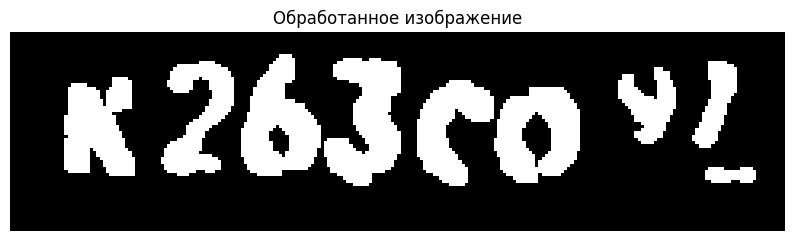

In [346]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Белый список символов (набор символов, которые могут быть в номере)
whitelist = 'ABCEHKMOPTXy0123456789'

# Генерация шаблонов для каждого символа
def generate_templates(whitelist):
    templates = {}
    for char in whitelist:
        img = np.zeros((50, 30), dtype=np.uint8)  # Пустое изображение для шаблона
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, char, (5, 40), font, 1.2, 255, 2, cv2.LINE_AA)  # Рисуем символ
        templates[char] = img
    return templates

# Нормализация ROI (приведение к фиксированным размерам)
def normalize_roi(roi):
    # Приведение ROI к фиксированным размерам 50x30
    resized = cv2.resize(roi, (30, 50), interpolation=cv2.INTER_CUBIC)

    # Утоньшение символов
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    eroded = cv2.erode(resized, kernel, iterations=1)

    return eroded

# Сравнение символов через XOR
def compare_symbols(roi, template):
    # Используем XOR для подсчёта несовпадающих пикселей
    diff = cv2.bitwise_xor(roi, template)
    total_pixels = roi.size
    mismatched_pixels = cv2.countNonZero(diff)
    similarity = 1 - (mismatched_pixels / total_pixels)  # Схожесть в диапазоне [0, 1]
    return similarity * 100  # Переводим в проценты

# Распознавание символов с гибким сравнением
def debug_character_recognition(image, templates):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    recognized_text = ""

    # Сортируем контуры слева направо
    sorted_contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])

    print(f"Найдено контуров для распознавания: {len(sorted_contours)}")
    for idx, contour in enumerate(sorted_contours):
        x, y, w, h = cv2.boundingRect(contour)
        if w > 10 and h > 20:  # Фильтруем слишком маленькие объекты
            roi = image[y:y+h, x:x+w]
            normalized_roi = normalize_roi(roi)

            print(f"\nСимвол {idx + 1} (x={x}, y={y}, w={w}, h={h}):")
            best_match = None
            max_similarity = -1
            debug_info = []
            return
            # Сравниваем ROI с каждым шаблоном
            for char, template in templates.items():
                similarity = compare_symbols(normalized_roi, template)
                debug_info.append((char, similarity))
                if similarity > max_similarity:
                    max_similarity = similarity
                    best_match = char

                # Визуализация текущего ROI и шаблона
                plt.figure(figsize=(8, 4))
                plt.subplot(1, 2, 1)
                plt.imshow(normalized_roi, cmap='gray')
                plt.title(f'Символ {idx + 1} (ROI, утоньшено)')
                plt.axis('off')

                plt.subplot(1, 2, 2)
                plt.imshow(template, cmap='gray')
                plt.title(f'Шаблон: {char}, Схожесть: {similarity:.2f}%')
                plt.axis('off')

                plt.tight_layout()
                plt.show()

            # Выводим проценты схожести с каждым символом из шаблона
            for char, similarity in debug_info:
                #print(f"  Шаблон: {char}, Схожесть: {similarity:.2f}%")
                pass
            if best_match is not None and max_similarity > 50:  # Порог схожести
                #print(f"  -> Распознан символ: {best_match}, Максимальная схожесть: {max_similarity:.2f}%")
                recognized_text += best_match
            else:
                print(f"  -> Не удалось распознать символ.")

    return recognized_text


# Генерация шаблонов
templates = generate_templates(whitelist)



# Распознавание текста с улучшенным дебагом
recognized_text = debug_character_recognition(processed_image1, templates)

print(f"\nРаспознанный номер: {recognized_text}")

# Визуализация результата
plt.figure(figsize=(10, 5))
plt.imshow(processed_image1, cmap='gray')
plt.title('Обработанное изображение')
plt.axis('off')
plt.show()


In [383]:
import easyocr
import cv2

def ocr_image_from_variable(img):
    """
    Выполняет OCR для изображения из переменной.
    
    :param img: Изображение в формате numpy (например, после загрузки с помощью OpenCV).
    :return: Распознанный текст.
    """
    reader = easyocr.Reader(['en'], gpu=True)  # Инициализация easyOCR
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Конвертация в оттенки серого
    
    # Запуск OCR
    results = reader.readtext(gray)
    
    text = ""
    for res in results:
        if len(results) == 1:
            text = res[1]
        if len(results) > 1 and len(res[1]) > 6 and res[2] > 0.2:  # Фильтрация текста
            text = res[1]
    
    return text

In [384]:
recognized_text = ocr_image_from_variable(resized_plate)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


error: OpenCV(4.10.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x46dff480::Set<1,-1,-1>,struct cv::impl::A0x46dff480::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [350]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Белый список символов (набор символов, которые могут быть в номере)
whitelist = 'ABCEHKMOPTXy0123456789'

# Архитектура модели CNN
def compute_output_size(input_size, kernel_size, stride, padding):
        return (input_size - kernel_size + 2 * padding) // stride + 1

class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        # Сверточные слои
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Вычисляем размеры после сверточных слоев
        height = compute_output_size(28, kernel_size=3, stride=1, padding=1)  # conv1
        height = compute_output_size(height, kernel_size=3, stride=1, padding=1)  # conv2
        height = compute_output_size(height, kernel_size=2, stride=2, padding=0)  # pool
        width = height  # Для квадратного входа

        # Полносвязные слои
        self.fc1 = nn.Linear(64 * height * width, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [366]:
# Устройство (CPU или GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Инициализация модели
num_classes = len(whitelist)
model = CNN(num_classes).to(device)

# Загрузка сохранённых весов
model.load_state_dict(torch.load("letter_recognition_model1.pth", map_location=device))
model.eval()


C:\Users\leonk\AppData\Local\Temp\ipykernel_22288\1427365130.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("letter_recognition_model1.

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12544, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=22, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [375]:
import cv2
import numpy as np
from torchvision import transforms
from matplotlib import pyplot as plt

# Преобразование для модели
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Приведение в диапазон [-1, 1]
])

# Функция для распознавания символов
def recognize_characters(image, model, whitelist):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    recognized_text = ""

    # Сортируем контуры слева направо
    sorted_contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])

    for idx, contour in enumerate(sorted_contours):
        x, y, w, h = cv2.boundingRect(contour)
        if w > 10 and h > 20:  # Фильтруем слишком маленькие объекты
            roi = image[y:y+h, x:x+w]

            # Приведение ROI к формату модели (28x28)
            roi_resized = transform(roi).unsqueeze(0).to(device)  # Добавляем размер батча

            # Предсказание
            with torch.no_grad():
                output = model(roi_resized)
                probabilities = torch.softmax(output, dim=1).cpu().numpy().flatten()

                # Топ-3 предсказания
                top3_indices = probabilities.argsort()[-3:][::-1]
                top3_characters = [whitelist[idx] for idx in top3_indices]
                
                top3_probs = [probabilities[idx] * 100 for idx in top3_indices]

                # Лучшее предсказание
                best_character = top3_characters[0]
                #recognized_text += best_character

                # Визуализация
                fig, ax = plt.subplots(1, 2, figsize=(10, 5))
                ax[0].imshow(roi, cmap='gray')
                ax[0].set_title(f"Contour {idx + 1}: Best Match '{best_character}'")
                ax[0].axis('off')

                bar_positions = range(len(top3_characters))
                ax[1].barh(bar_positions, top3_probs, align='center')
                ax[1].set_yticks(bar_positions)
                ax[1].set_yticklabels(top3_characters)
                ax[1].invert_yaxis()  # Ставим сверху лучший результат
                ax[1].set_xlabel('Probability (%)')
                ax[1].set_title("Top-3 Predictions")

                plt.tight_layout()
                plt.show()

    return recognized_text


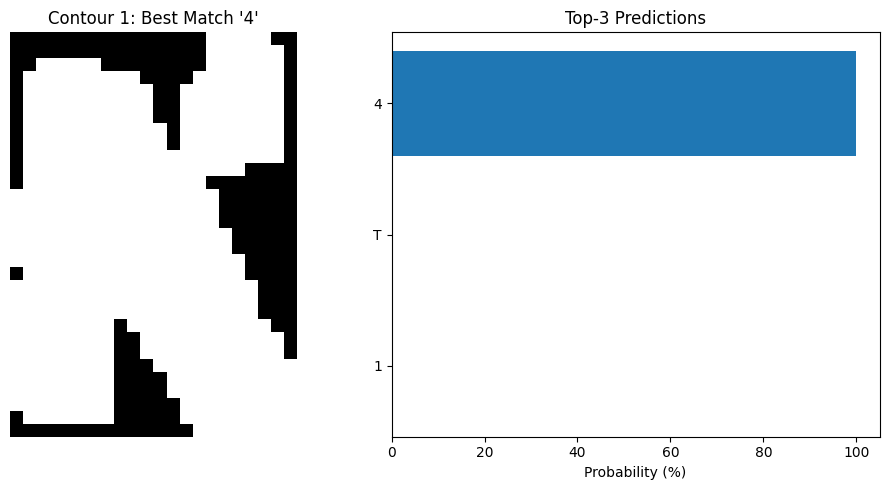

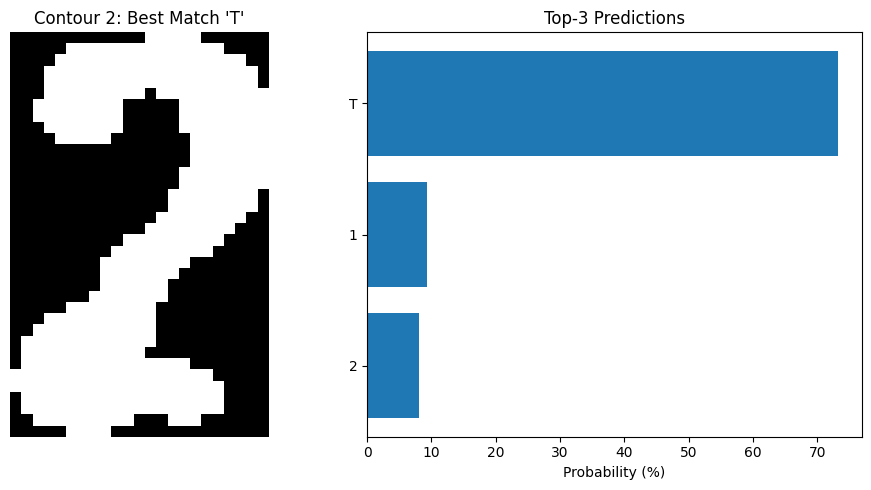

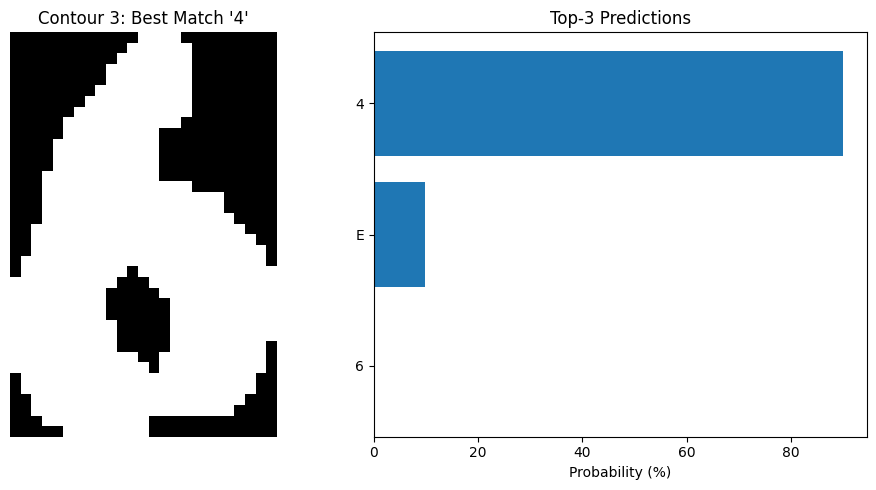

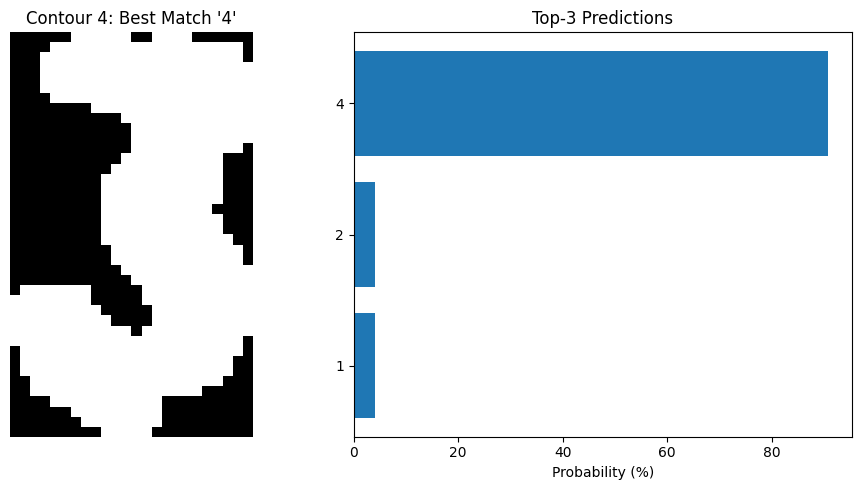

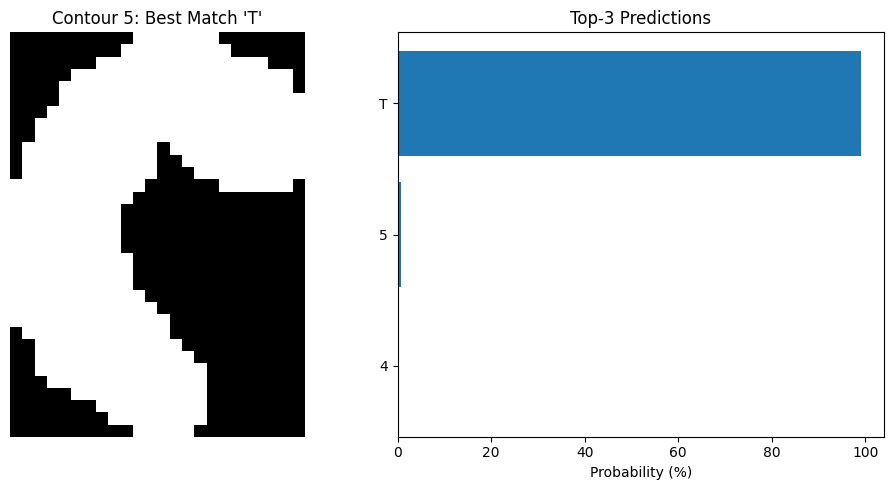

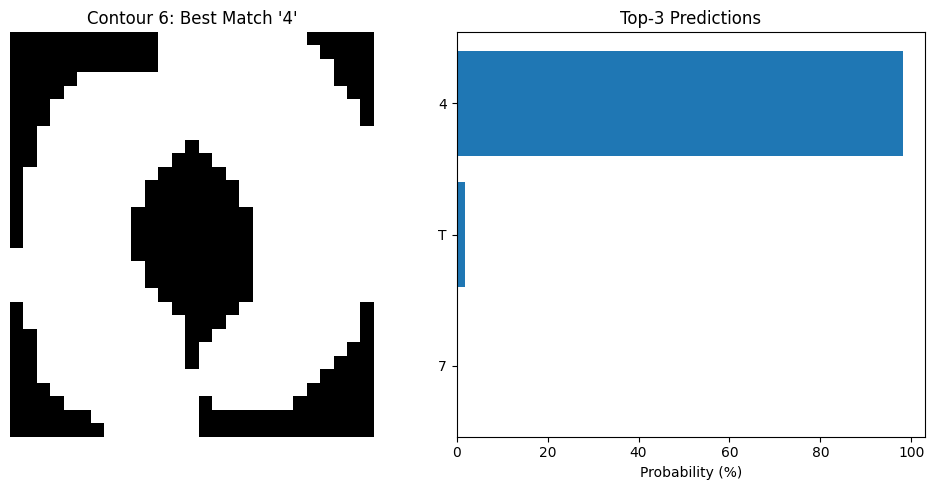

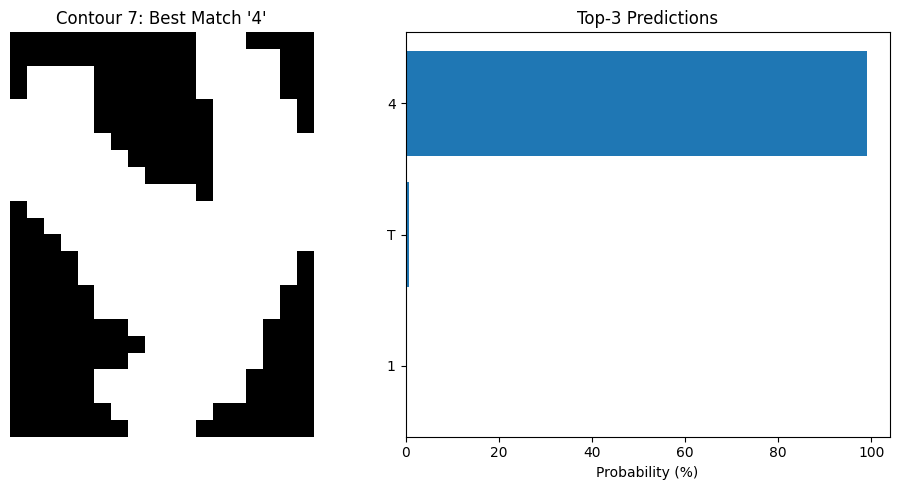

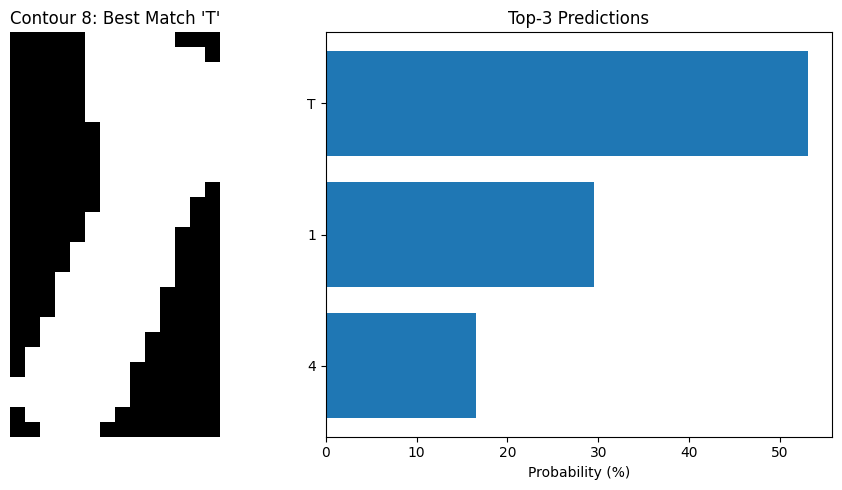


Распознанный номер: 


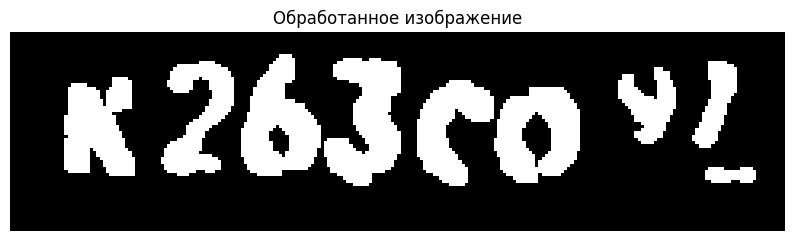

In [376]:

# Распознавание текста
recognized_text = recognize_characters(processed_image1, model, whitelist)

# Вывод результата
print(f"\nРаспознанный номер: {recognized_text}")

# Визуализация результата
plt.figure(figsize=(10, 5))
plt.imshow(processed_image1, cmap='gray')
plt.title('Обработанное изображение')
plt.axis('off')
plt.show()


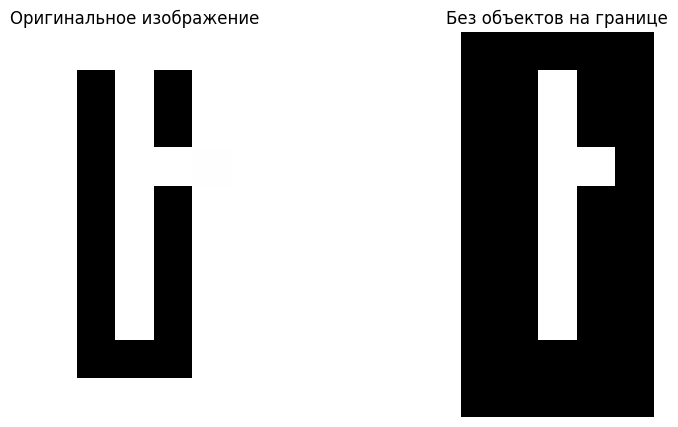

In [217]:
import cv2
import numpy as np

def imclearborder(imgBW, connectivity=8):
    """
    Удаляет только те пиксели объектов, которые непосредственно касаются границ изображения.
    
    :param imgBW: Бинарное изображение (чёрно-белое, 0 и 255).
    :param connectivity: Тип связности (4 или 8). 8-связность по умолчанию.
    :return: Изображение с удалёнными пикселями, касающимися границ.
    """
    # Находим связные компоненты
    num_labels, labels = cv2.connectedComponents(imgBW, connectivity)

    # Создаем маску для граничных пикселей
    border_mask = np.zeros_like(labels)

    # Помечаем пиксели на границах
    border_mask[0, :] = labels[0, :]   # Верхняя граница
    border_mask[-1, :] = labels[-1, :]  # Нижняя граница
    border_mask[:, 0] = labels[:, 0]   # Левая граница
    border_mask[:, -1] = labels[:, -1]  # Правая граница

    # Уникальные метки на границах
    border_labels = np.unique(border_mask)

    # Удаляем только пиксели на границе, не трогая внутренние области
    result = imgBW.copy()
    for label in border_labels:
        if label != 0:  # Пропускаем фон
            result[(labels == label) & (border_mask == label)] = 0

    return result

# Бинарное изображение
imgBW = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1],
    [1, 0, 1, 1, 2],
    [1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1]
], dtype=np.uint8) * 255

# Удаление объектов, касающихся границы
result = imclearborder(imgBW)

# Визуализация
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imgBW, cmap='gray')
plt.title('Оригинальное изображение')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Без объектов на границе')
plt.axis('off')

plt.show()


Распознанный номер для img/1.jpg: 


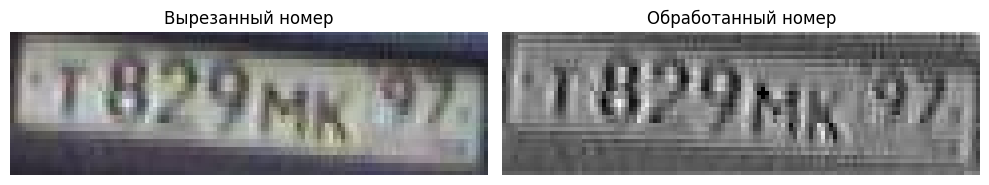

In [168]:
import numpy as np
import cv2
import pytesseract
from matplotlib import pyplot as plt

# Настройки для распознавания
whitelist = 'ABCEHMOPTXyK0123456789'

# Функция для создания эталонных шаблонов символов
def generate_templates(whitelist):
    templates = {}
    for char in whitelist:
        img = np.zeros((50, 30), dtype=np.uint8)  # Пустое изображение для символа
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, char, (5, 40), font, 1.2, 255, 2, cv2.LINE_AA)
        templates[char] = img
    return templates

# Нахождение символов и сопоставление
def recognize_characters(image, templates):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    recognized_text = ""

    for contour in sorted(contours, key=lambda x: cv2.boundingRect(x)[0]):  # Сортировка слева направо
        x, y, w, h = cv2.boundingRect(contour)
        if w > 10 and h > 20:  # Фильтр по размеру символов
            roi = image[y:y+h, x:x+w]
            roi_resized = cv2.resize(roi, (30, 50), interpolation=cv2.INTER_CUBIC)  # Приведение к стандартному размеру

            # Сравнение с шаблонами
            best_match = None
            max_corr = -1
            for char, template in templates.items():
                res = cv2.matchTemplate(roi_resized, template, cv2.TM_CCOEFF_NORMED)
                _, corr, _, _ = cv2.minMaxLoc(res)
                if corr > max_corr:
                    max_corr = corr
                    best_match = char

            if best_match is not None and max_corr > 0.5:  # Порог корреляции
                recognized_text += best_match

    return recognized_text

# Основной обработчик
def process_plate(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Не удалось загрузить изображение: {image_path}")
        return

    # Преобразование в градации серого и пороговая обработка
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(img_gray, 100, 200, cv2.THRESH_TOZERO_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Нахождение области номерного знака
    plate = None
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = float(w) / h
        if aspect_ratio >= 3 and w * h > 600:
            plate = image[y:y + h, x:x + w]
            break

    if plate is None:
        print(f"Номерной знак не найден на изображении: {image_path}")
        return

    # Преобразование вырезанного номера
    gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

    # Применение гомоморфной фильтрации
    processed_plate = homomorphic_filter(gray_plate)

    # Нахождение и распознавание символов
    templates = generate_templates(whitelist)
    recognized_text = recognize_characters(processed_plate, templates)

    print(f"Распознанный номер для {image_path}: {recognized_text}")

    # Визуализация
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))
    plt.title("Вырезанный номер")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(processed_plate, cmap="gray")
    plt.title("Обработанный номер")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Пример обработки
images = ['img/1.jpg']
for img_path in images:
    process_plate(img_path)


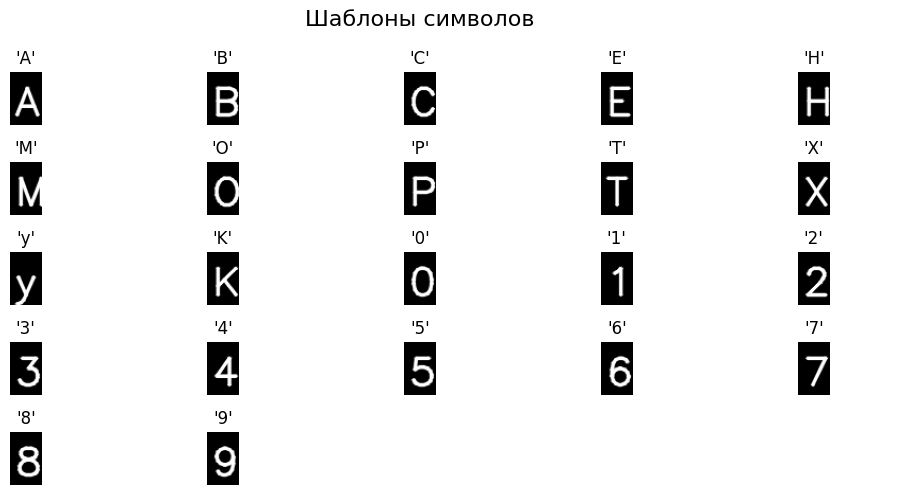

In [160]:
import matplotlib.pyplot as plt

# Функция для отображения шаблонов
def display_templates(templates):
    n_templates = len(templates)
    cols = 5  # Количество столбцов в сетке
    rows = (n_templates + cols - 1) // cols  # Количество строк для размещения всех символов

    fig, axes = plt.subplots(rows, cols, figsize=(10, 5))
    fig.suptitle("Шаблоны символов", fontsize=16)

    # Проходим по всем шаблонам
    for i, (char, img) in enumerate(templates.items()):
        row, col = divmod(i, cols)
        axes[row, col].imshow(img, cmap='gray')
        axes[row, col].set_title(f"'{char}'")
        axes[row, col].axis('off')

    # Удаляем лишние оси
    for j in range(i + 1, rows * cols):
        row, col = divmod(j, cols)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

# Пример использования
templates = generate_templates(whitelist)  # Генерация шаблонов
display_templates(templates)  # Отображение
